In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

In [2]:
acumulado = pd.read_csv("csv/dinero_acumulado.csv", sep=",")
gasto_ttl_mes = pd.read_csv("csv/gasto_mensual_total_usuario.csv", sep=",")
gasto_ttl_mes_fruta = pd.read_csv("csv/gasto_mensual_total_fruta_usuario.csv", sep=",")
cantidades_mes = pd.read_csv("csv/unidades frutas vendidas mes region - cantidad de frutas vendidas en cada mes separadas por region.csv", sep=",")

In [3]:
cantidades_mes[(cantidades_mes["fruta"] == "naranja") & (cantidades_mes["mes"] == 12)]

,region,fruta,mes,total
118,1,naranja,12,1191
119,2,naranja,12,13693


### El número de unidades vendidas el mes de cada fruta, separado por región.

In [26]:
colores_frutas = {
    "manzana": "green",
    "limon": "yellow",
    "naranja": "orange",
    "melon": "blue",
    "kiwi": "red"
}

In [4]:
reg1 = cantidades_mes[cantidades_mes["region"] == 1]
reg2 = cantidades_mes[cantidades_mes["region"] == 2]

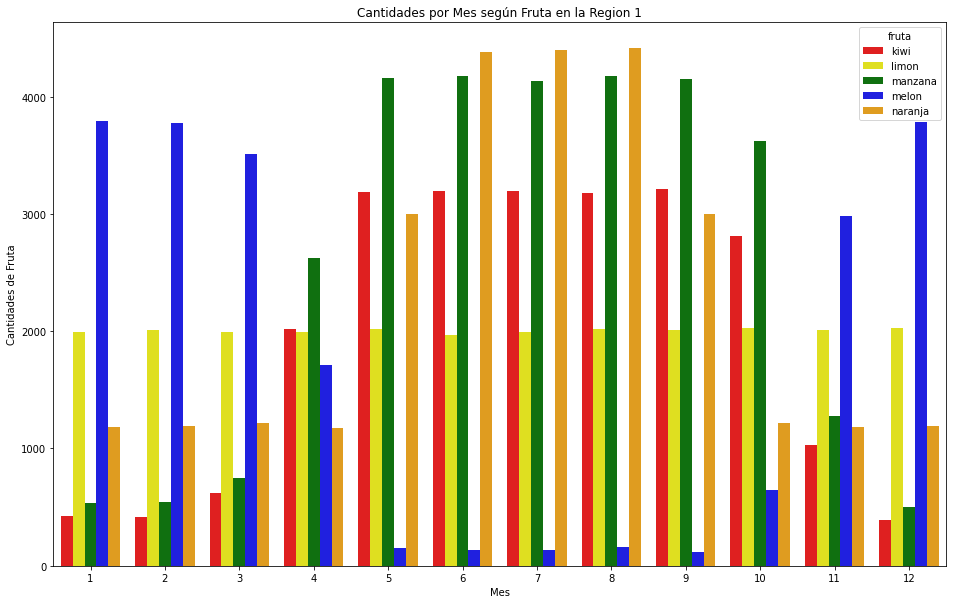

In [27]:
fig, ax = plt.subplots(figsize=(16, 10))

g = sns.barplot(
    data=reg1,
    x="mes", y="total", hue="fruta",
    ax = ax, palette=colores_frutas
)

plt.title("Cantidades por Mes según Fruta en la Region 1")
plt.ylabel("Cantidades de Fruta")
plt.xlabel("Mes")


plt.show()

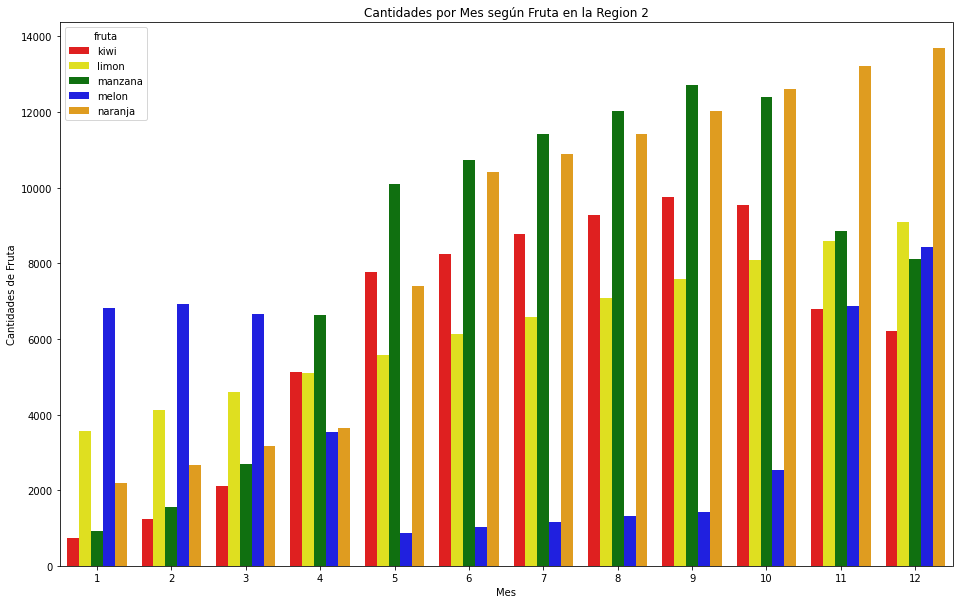

In [28]:
fig, ax = plt.subplots(figsize=(16, 10))

g = sns.barplot(
    data=reg2,
    x="mes", y="total", hue="fruta",
    ax = ax, palette=colores_frutas
)

plt.title("Cantidades por Mes según Fruta en la Region 2")
plt.ylabel("Cantidades de Fruta")
plt.xlabel("Mes")


plt.show()

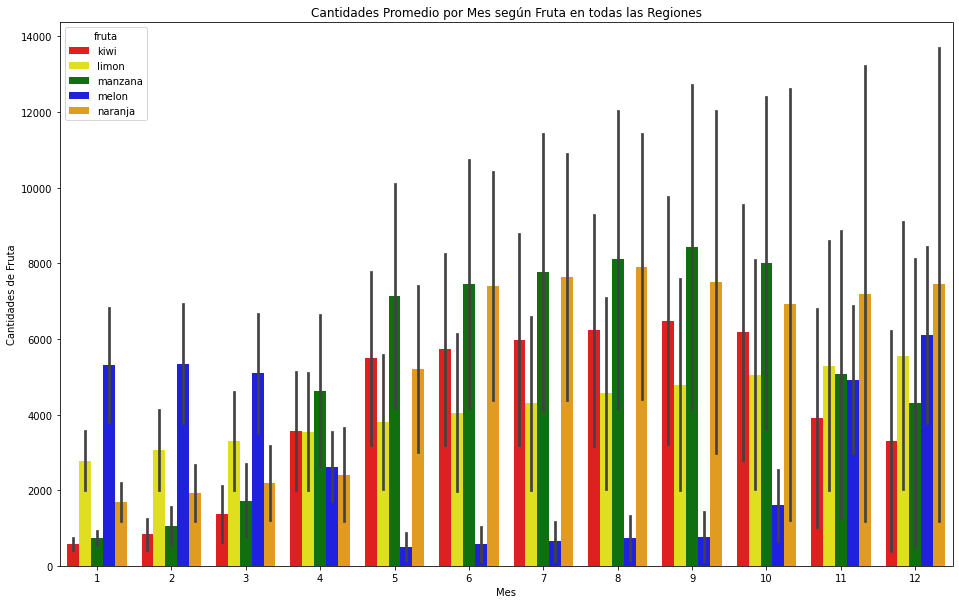

In [29]:

fig, ax = plt.subplots(figsize=(16, 10))

g = sns.barplot(
    data=cantidades_mes,
    x="mes", y="total", hue="fruta",
    ax = ax, palette=colores_frutas
)

plt.title("Cantidades Promedio por Mes según Fruta en todas las Regiones")
plt.ylabel("Cantidades de Fruta")
plt.xlabel("Mes")


plt.show()

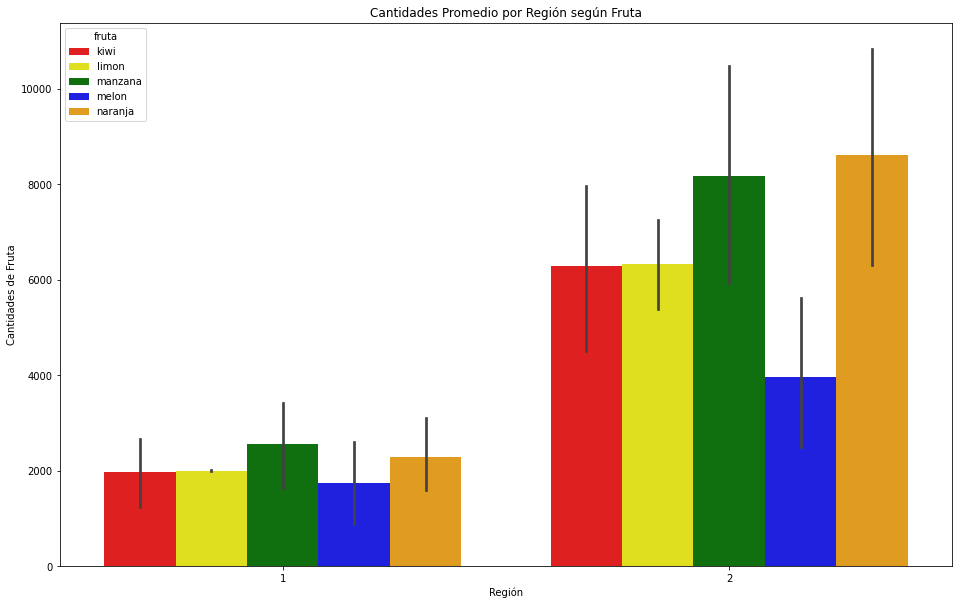

In [34]:

fig, ax = plt.subplots(figsize=(16, 10))

g = sns.barplot(
    data=cantidades_mes,
    x="region", y="total", hue="fruta",
    ax = ax, palette=colores_frutas
)

plt.title("Cantidades Promedio por Región según Fruta")
plt.ylabel("Cantidades de Fruta")
plt.xlabel("Región")


plt.show()

### El dinero acumulado que ha entrado a la tienda.

In [9]:
acumulado

,mes,entrante,ganancias_acumuladas
0,1,5310950,5310950
1,2,5743400,11054350
2,3,6195050,17249400
3,4,6661900,23911300
4,5,8379450,32290750
5,6,9786000,42076750
6,7,10221550,52298300
7,8,10689450,62987750
8,9,10776650,73764400
9,10,10804950,84569350


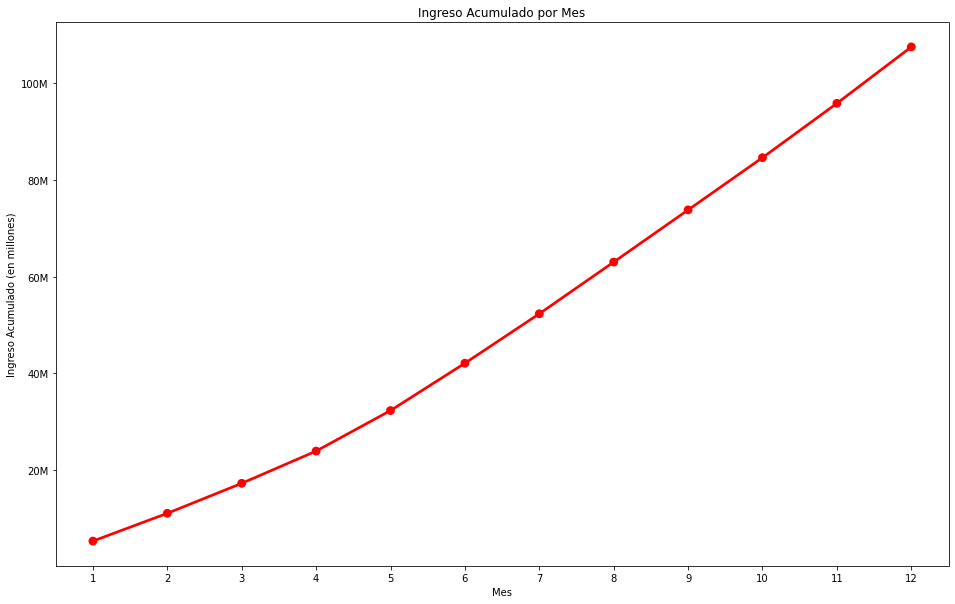

In [10]:
def millones_formatter(x, pos):
    return '{:.0f}M'.format(x*1e-6)

fig, ax = plt.subplots(figsize=(16, 10))

sns.pointplot(
    data=acumulado,
    x="mes", y="ganancias_acumuladas", ax=ax, color="red"
)

formatter = FuncFormatter(millones_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.title("Ingreso Acumulado por Mes")
plt.xlabel("Mes")
plt.ylabel("Ingreso Acumulado (en millones)")

plt.show()

### La distribución del dinero que gastan los clientes en la tienda. Hazlo de forma que sea un gráfico que se entienda (por ejemplo, algunos boxplot para distintos meses o grupos de meses)

In [11]:
gasto_ttl_mes

,usuario_id,region,mes,entrante
0,1,1,1,11700
1,1,1,3,6400
2,1,1,4,4750
3,1,1,5,7650
4,1,1,6,7750
...,...,...,...,...
4365,256,1,12,5550
4366,257,1,12,9450
4367,259,1,12,11400
4368,260,1,12,8750


In [14]:
gasto_ttl_mes_reg1 = gasto_ttl_mes_fruta[gasto_ttl_mes_fruta["region"] == 1]
gasto_ttl_mes_reg2 = gasto_ttl_mes_fruta[gasto_ttl_mes_fruta["region"] == 2]

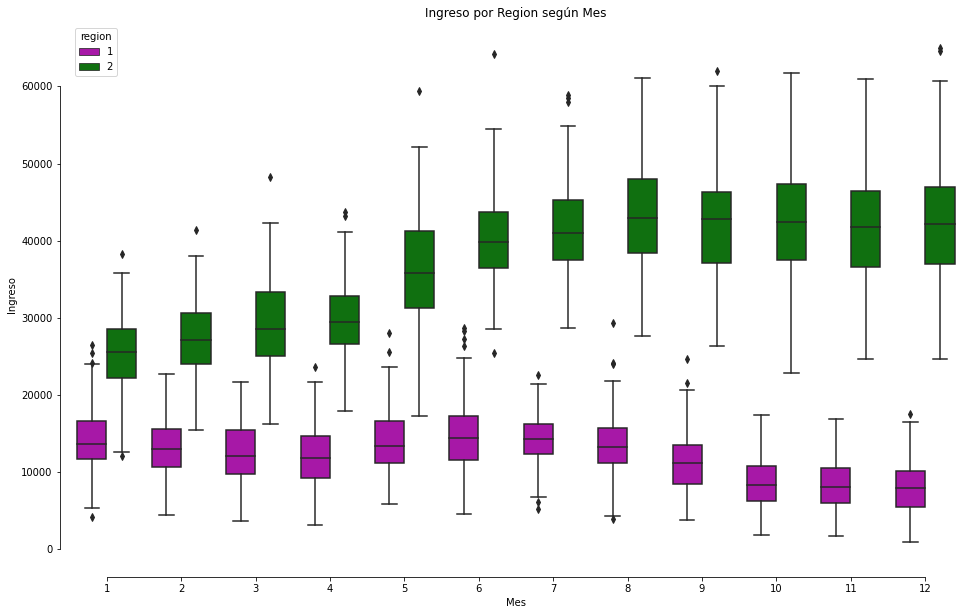

In [12]:

fig, ax = plt.subplots(figsize=(16, 10))


sns.boxplot(x="mes", y="entrante",
            hue="region", palette=["m", "g"],
            data=gasto_ttl_mes)
sns.despine(offset=10, trim=True)

plt.title("Ingreso por Region según Mes")
plt.xlabel("Mes")
plt.ylabel("Ingreso")


plt.show()


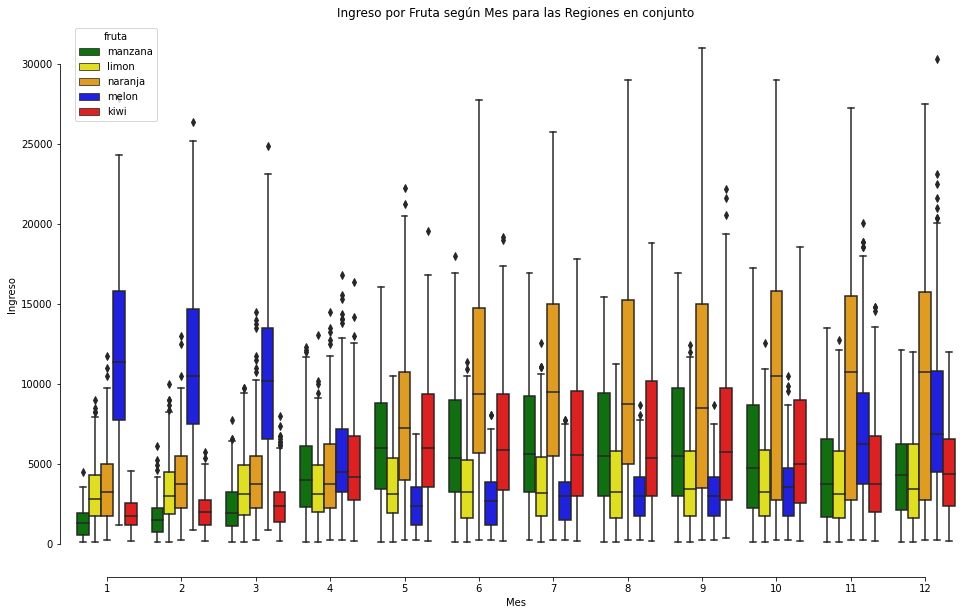

In [37]:
fig, ax = plt.subplots(figsize=(16, 10))


sns.boxplot(x="mes", y="entrante",
            hue="fruta", palette=colores_frutas,
            data=gasto_ttl_mes_fruta)
sns.despine(offset=10, trim=True)

plt.title("Ingreso por Fruta según Mes para las Regiones en Conjunto")
plt.xlabel("Mes")
plt.ylabel("Ingreso")
plt.show()

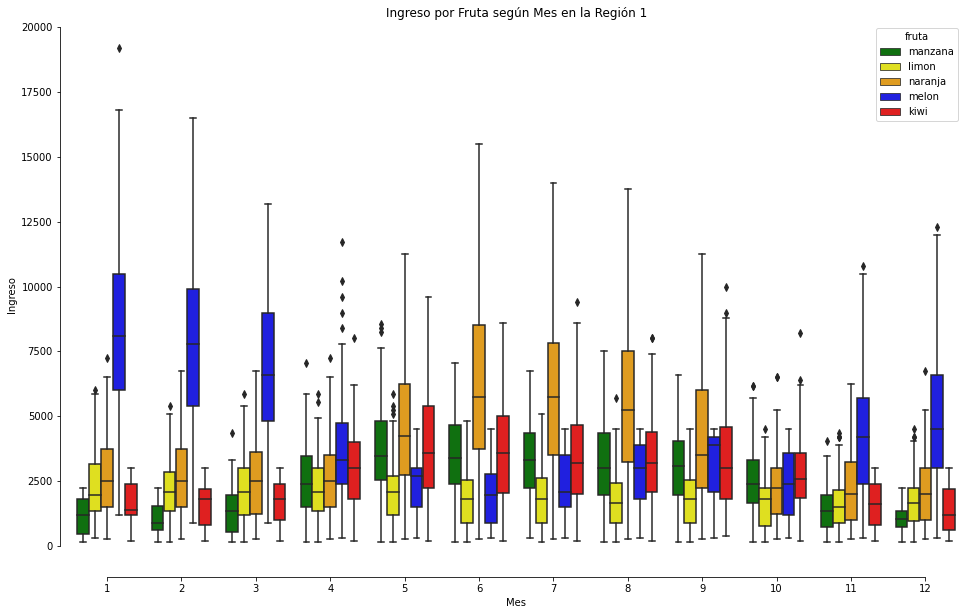

In [36]:


fig, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(x="mes", y="entrante",
            hue="fruta", palette=colores_frutas,
            data=gasto_ttl_mes_reg1)

sns.despine(offset=10, trim=True)

plt.title("Ingreso por Fruta según Mes en la Región 1")
plt.xlabel("Mes")
plt.ylabel("Ingreso")
plt.show()

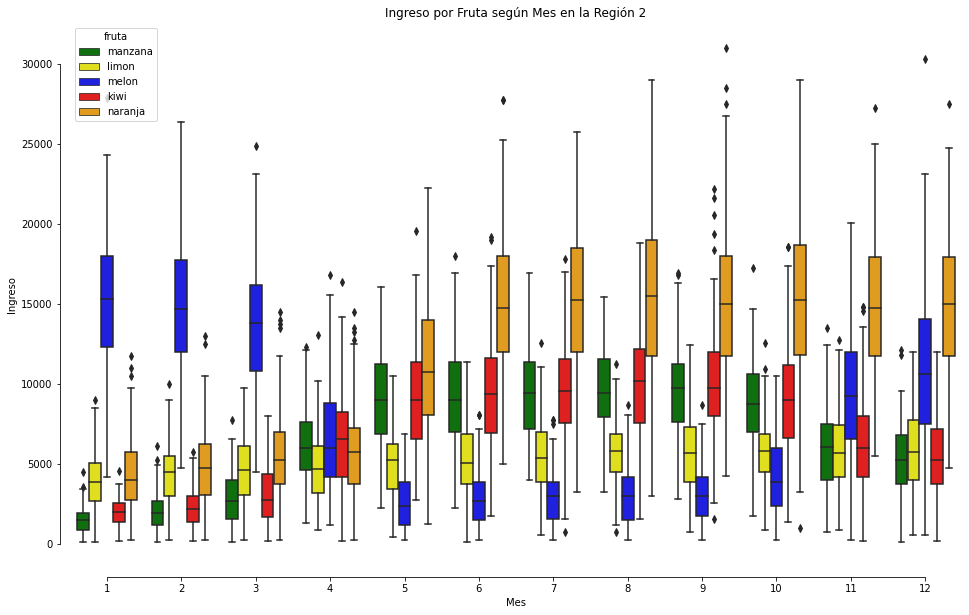

In [31]:
fig, ax = plt.subplots(figsize=(16, 10))


sns.boxplot(x="mes", y="entrante",
            hue="fruta", palette=colores_frutas,
            data=gasto_ttl_mes_reg2)
sns.despine(offset=10, trim=True)



plt.title("Ingreso por Fruta según Mes en la Región 2")
plt.xlabel("Mes")
plt.ylabel("Ingreso")
plt.show()

### ¿Que región crees que va en crecimiento y va a aumentar su demanda el siguiente año?

La región que va a registrar un crecimiento el año que sigue sera la dos, puesto que como es observable en la cantidad de gasto mensual en esta región cada vez se tienen más ingresos, cosa que en la región 1 no se ve pues cada mes se tiene una menor cantidad de compras por menores montos.

En cuanto a la demanda, la región dos supera por mucho en cantidades totales a la región 1, como es visible en el grafico "Cantidades Promedio por Región según Fruta", pues por cada fruta en promedio anual la región 2 supera a la 1, y en compras mensuales la región 1 llega a un poco más de 4000 unidades, mientras que la región 2 se alcanzan casi 14000 unidades.

### ¿Puedes ver alguna relación entre la venta de las frutas?

Es notorio como en terminos generales por año para las regiones en conjunto, se notan las temporadas de las frutas, por ejemplo los melones se compran entre enero y marzo, luego se disminuye su venta a niveles bastante bajos hasta que a finales de año vuelven a repuntar.

En el caso de las naranjas tambien se nota como su "temporada" es durante los meses de Mayo hasta el fin de año, otro caso con los kiwis que se venden mas en Abril y en Octubre se comienzan a vender menos.

### Tu amigo tiene una predicción de la demanda del kiwi para el próximo año en distintas regiones. ¿Cómo lo harías para predecir la venta de una o más frutas en base a esa predicción?

Una forma de realizar una predición, es buscar si existe una relacion entre las ventas de kiwi con alguna de las demas frutas, es decir el kiwi tiene alguna correlación con que la gente compre algo más en conjunto con el kiwi.

De esta forma se podria estimar que si tiene la predicción, se puede estimar cuanto se puede vender otra fruta según la correlación que se posea entre una fruta y otra que se compre en conjunto con el kiwi.